In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#import statsmodels.api as sm

# Importing the dataset

In [72]:
df=pd.read_csv('final_df.csv')

In [73]:
df

,category,category_inch,frame_size,weight (lbs),engine,engine_position,engine_power,mph,battery_type,battery_chara_Wh,...,Suspension_model,Permissible_max_weight_lbs,Lighting,Rack,Fenders,Company_Name,Price,Model_year,Frame_type,ebike_type
0,NaN,28,NaN,NaN,BoschActiveLinePlus,midengine,250.0,20,Lithium-IonenAkku,500.0,...,Paragon,243,Yes,No,Yes,HNF Heisenberg,3951,2018,male,Pedelec
1,City/Urban,-,"S,M,L,XL",55.0,BoschPerformanceLine,midengine,250.0,20,Lithium-IonenAkku,500.0,...,Paragon,276,Yes,No,Yes,HNF Heisenberg,3682,2017,unisex,Pedelec
2,NaN,-,NaN,NaN,broseDriveT,midengine,250.0,20,Lithium-IonenAkku,522.0,...,NaN,496,Yes,Yes,Yes,Johansson,5172,2021,unisex,Pedelec
3,CargoBike,20,NaN,86.0,broseDriveS,midengine,250.0,20,Lithium-IonenAkku,522.0,...,NaN,496,Yes,Yes,Yes,Johansson,5392,2021,unisex,Pedelec
4,NaN,20,NaN,NaN,broseDriveS,midengine,250.0,20,Lithium-IonenAkku,522.0,...,NaN,507,Yes,Yes,Yes,Johansson,5667,2021,unisex,Pedelec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,City/Urban,28,"54,59",NaN,Bosch,midengine,250.0,20,Lithium-IonenAkku,0.0,...,NaN,-,Yes,Yes,Yes,Gazelle,2530,2017,male,Pedelec
2143,TrekkingBike,28,"53,57,49",NaN,Bosch,midengine,250.0,20,Lithium-IonenAkku,0.0,...,NaN,-,Yes,Yes,Yes,Gazelle,3301,2017,female,Pedelec
2144,City/Urban,28,"57,61",NaN,BoschActiveLine,midengine,250.0,20,Lithium-IonenAkku,0.0,...,NaN,-,Yes,Yes,Yes,Gazelle,2971,2017,female,Pedelec
2145,NaN,28,NaN,NaN,BoschActiveLine,midengine,250.0,20,Lithium-IonenAkku,0.0,...,NaN,-,Yes,Yes,Yes,Gazelle,2971,2017,female,Pedelec


In [74]:
df.isnull().mean()

category                      0.406614
category_inch                 0.000000
frame_size                    0.470890
weight (lbs)                  0.608291
engine                        0.004658
engine_position               0.010247
engine_power                  0.022823
mph                           0.000000
battery_type                  0.004658
battery_chara_Wh              0.004658
battery_chara_Ah              0.004658
battery_chara_V               0.004658
battery_position              0.023288
Gearshift                     0.001863
Gears                         0.079646
Gearshift_Brand               0.055892
Brakes_Type                   0.000000
Brakes_Model                  0.067070
Suspension_front_rear         0.000000
Suspension_brand              0.387517
Suspension_model              0.391244
Permissible_max_weight_lbs    0.000000
Lighting                      0.000000
Rack                          0.000000
Fenders                       0.000000
Company_Name             

# Checking dtypes of variables

In [75]:
df.dtypes

category                       object
category_inch                  object
frame_size                     object
weight (lbs)                  float64
engine                         object
engine_position                object
engine_power                  float64
mph                             int64
battery_type                   object
battery_chara_Wh              float64
battery_chara_Ah              float64
battery_chara_V               float64
battery_position               object
Gearshift                      object
Gears                         float64
Gearshift_Brand                object
Brakes_Type                    object
Brakes_Model                   object
Suspension_front_rear          object
Suspension_brand               object
Suspension_model               object
Permissible_max_weight_lbs     object
Lighting                       object
Rack                           object
Fenders                        object
Company_Name                   object
Price       

In [76]:
df['category'] = df['category'].astype('str')

In [77]:
df['category_inch'].value_counts()

28      1305
29       401
27.5     128
26       122
-         69
20        50
12        31
27        17
24        15
18         9
Name: category_inch, dtype: int64

In [78]:
df['category_inch'] = df['category_inch'].replace(['-'],np.nan)       # replacing '-' in category-inch column

In [79]:
df['Permissible_max_weight_lbs'] = df['Permissible_max_weight_lbs'].replace(['-'],np.nan)       # replacing '-' in category-inch column

In [80]:
df['category_inch'] = df['category_inch'].astype('float')

In [81]:
df['frame_size'].value_counts()                # unnecessary column

S,M,L,XL          227
S,M,L              56
44,48,52,56        37
45,50,55           31
44,48,52           30
                 ... 
48,50,53,58         1
55                  1
50,55               1
54,56,59            1
47,50,53,56,59      1
Name: frame_size, Length: 200, dtype: int64

In [82]:
del df['frame_size']

In [83]:
df['category'] = df['category'].replace(['nan'],np.nan)      # replacing 'nan' string in category

# Imputing nan values

In [84]:
df2=df

In [85]:
from sklearn.impute import SimpleImputer

In [86]:
df2.isnull().mean()

category                      0.406614
category_inch                 0.032138
weight (lbs)                  0.608291
engine                        0.004658
engine_position               0.010247
engine_power                  0.022823
mph                           0.000000
battery_type                  0.004658
battery_chara_Wh              0.004658
battery_chara_Ah              0.004658
battery_chara_V               0.004658
battery_position              0.023288
Gearshift                     0.001863
Gears                         0.079646
Gearshift_Brand               0.055892
Brakes_Type                   0.000000
Brakes_Model                  0.067070
Suspension_front_rear         0.000000
Suspension_brand              0.387517
Suspension_model              0.391244
Permissible_max_weight_lbs    0.601304
Lighting                      0.000000
Rack                          0.000000
Fenders                       0.000000
Company_Name                  0.000000
Price                    

In [87]:
#df1.rename('weight (lbs)','weight')
df2=df2.rename(columns={'weight (lbs)':'weight'})

In [88]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#df['model_year'] = imp.fit_transform(df[['model_year']])
df1['category'] = imp.fit_transform(df1[['category']])


#df['ebike_type'] = imp.fit_transform(df[['ebike_type']])
#df['frame_type'] = imp.fit_transform(df[['frame_type']])
df2['engine'] = imp.fit_transform(df2[['engine']])
df2['engine_position'] = imp.fit_transform(df2[['engine_position']])

df2['battery_type'] = imp.fit_transform(df2[['battery_type']])
df2['battery_position'] = imp.fit_transform(df2[['battery_position']])

df2['Gearshift_Brand'] = imp.fit_transform(df2[['Gearshift_Brand']])
df2['Gearshift'] = imp.fit_transform(df2[['Gearshift']])

df2['Brakes_Model'] = imp.fit_transform(df2[['Brakes_Model']])
df2['Suspension_brand'] = imp.fit_transform(df2[['Suspension_brand']])
df2['Suspension_model'] = imp.fit_transform(df2[['Suspension_model']])
df2['Permissible_max_weight_lbs'] = imp.fit_transform(df2[['Permissible_max_weight_lbs']])

In [89]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

df2['category_inch'] = imp.fit_transform(df2[['category_inch']])
df2['mph'] = imp.fit_transform(df2[['mph']])
df2['weight'] = imp.fit_transform(df2[['weight']])

df2['engine_power'] = imp.fit_transform(df2[['engine_power']])

df2['battery_chara_Wh'] = imp.fit_transform(df2[['battery_chara_Wh']])
df2['battery_chara_Ah'] = imp.fit_transform(df2[['battery_chara_Ah']])
df2['battery_chara_V'] = imp.fit_transform(df2[['battery_chara_V']])

df2['Gears'] = imp.fit_transform(df2[['Gears']])

<AxesSubplot:>

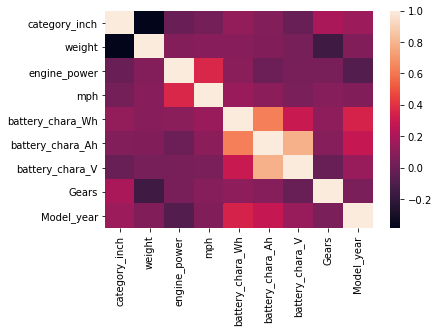

In [91]:
z=df2.corr()
sns.heatmap(z)

In [92]:
z

,category_inch,weight,engine_power,mph,battery_chara_Wh,battery_chara_Ah,battery_chara_V,Gears,Model_year
category_inch,1.000000,-0.384173,-0.006035,0.030394,0.124143,0.070237,-0.012202,0.198959,0.156182
weight,-0.384173,1.000000,0.078564,0.087083,0.090092,0.068840,0.032705,-0.154418,0.065835
engine_power,-0.006035,0.078564,1.000000,0.362689,0.092101,-0.001848,0.039668,0.038586,-0.082710
mph,0.030394,0.087083,0.362689,1.000000,0.148855,0.099763,0.047016,0.083633,0.066728
battery_chara_Wh,0.124143,0.090092,0.092101,0.148855,1.000000,0.627624,0.302423,0.112640,0.350813
battery_chara_Ah,0.070237,0.068840,-0.001848,0.099763,0.627624,1.000000,0.790842,0.082073,0.289652
battery_chara_V,-0.012202,0.032705,0.039668,0.047016,0.302423,0.790842,1.000000,-0.011364,0.140987
Gears,0.198959,-0.154418,0.038586,0.083633,0.112640,0.082073,-0.011364,1.000000,0.044844
Model_year,0.156182,0.065835,-0.082710,0.066728,0.350813,0.289652,0.140987,0.044844,1.000000


# Encoding the categorical variables

In [93]:
df2

,category,category_inch,weight,engine,engine_position,engine_power,mph,battery_type,battery_chara_Wh,battery_chara_Ah,...,Suspension_model,Permissible_max_weight_lbs,Lighting,Rack,Fenders,Company_Name,Price,Model_year,Frame_type,ebike_type
0,NaN,28.000000,54.116528,BoschActiveLinePlus,midengine,250.0,20.0,Lithium-IonenAkku,500.0,14.0,...,Paragon,243,Yes,No,Yes,HNF Heisenberg,3951,2018,male,Pedelec
1,City/Urban,27.533205,55.000000,BoschPerformanceLine,midengine,250.0,20.0,Lithium-IonenAkku,500.0,14.0,...,Paragon,276,Yes,No,Yes,HNF Heisenberg,3682,2017,unisex,Pedelec
2,NaN,27.533205,54.116528,broseDriveT,midengine,250.0,20.0,Lithium-IonenAkku,522.0,15.0,...,NCXD-LO,496,Yes,Yes,Yes,Johansson,5172,2021,unisex,Pedelec
3,CargoBike,20.000000,86.000000,broseDriveS,midengine,250.0,20.0,Lithium-IonenAkku,522.0,15.0,...,NCXD-LO,496,Yes,Yes,Yes,Johansson,5392,2021,unisex,Pedelec
4,NaN,20.000000,54.116528,broseDriveS,midengine,250.0,20.0,Lithium-IonenAkku,522.0,15.0,...,NCXD-LO,507,Yes,Yes,Yes,Johansson,5667,2021,unisex,Pedelec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,City/Urban,28.000000,54.116528,Bosch,midengine,250.0,20.0,Lithium-IonenAkku,0.0,0.0,...,NCXD-LO,265,Yes,Yes,Yes,Gazelle,2530,2017,male,Pedelec
2143,TrekkingBike,28.000000,54.116528,Bosch,midengine,250.0,20.0,Lithium-IonenAkku,0.0,0.0,...,NCXD-LO,265,Yes,Yes,Yes,Gazelle,3301,2017,female,Pedelec
2144,City/Urban,28.000000,54.116528,BoschActiveLine,midengine,250.0,20.0,Lithium-IonenAkku,0.0,0.0,...,NCXD-LO,265,Yes,Yes,Yes,Gazelle,2971,2017,female,Pedelec
2145,NaN,28.000000,54.116528,BoschActiveLine,midengine,250.0,20.0,Lithium-IonenAkku,0.0,0.0,...,NCXD-LO,265,Yes,Yes,Yes,Gazelle,2971,2017,female,Pedelec


In [94]:
category_mapping ={'MountainBike/ATB': 1, 'TrekkingBike':2, 'City/Urban': 3, 'Lifestyle/Cruiser': 4,'Fitness/Racebike':5,
                   'CargoBike':6,'Folding/Compact':7}

df2['category'] = df2['category'].map(category_mapping)

In [95]:
category_mapping ={'Pedelec': 1, 'S-Pedelec':2}

df2['ebike_type'] = df2['ebike_type'].map(category_mapping)

In [96]:
frame_type_mapping ={'male': 1, 'unisex':2,'step':3 ,'female':4,'child':5 ,'specified':6}

df2['Frame_type'] = df2['Frame_type'].map(frame_type_mapping)

In [97]:
engine_mapping ={'BoschActiveLinePlus':1, 'BoschPerformanceLine':2, 'broseDriveT':3,
       'broseDriveS':4, 'broseDriveC':5, 'broseDriveSMag':6, 'broseDriveTMag':7,
       'BoschPerformanceLineCX':8, 'broseDriveCMag':9, 'Positionrearhub':10,
       'BoschPerformanceLineSpeed':11, 'ShimanoDU-E8000':12, 'YamahaPW-SE':13,
       'BoschPeformanceLineCruise':14, 'YamahaYamahaPW-ST':15,
       'YamahaNewPowerUnit':16, 'ShimanoShimanoSteps6000':17,
       'ShimanoStepsE-8000':18, 'BoschActiveLine':19, 'Groove2.0':20,
       'Continentale-BikeSystem':21, 'YamahaPW-X':22, 'ShimanoSTePSDU-E6001':23,
       'Specialized(brose)Specialized(brosedrive)':24, 'YamahaPW':25,
       'TDCMSYNODrive':26, 'CYRODrive':27, 'QWICHeckmotor':28, 'Positionmidengine':29,
       'BafangMaxDrive':30, 'EasyMotionThruAxle':31, 'ImpulseEvoRS':32,
       'BafangGroove':33, 'Impulse2.0':34, 'neodrivesZ20':35, 'ImpulseEvoRSSpeed':36,
       'YamahaPWDriveUnit':37, 'YamahaSyncDriveSport':38, 'YamahaSyncDrivePro':39,
       'YamahaSyncDriveLife':40, 'BafangMMG31.250':41, 'BafangFMG11.250.D':42,
       'brosee-Bike250W':43, 'brosee-Bike350W':44, 'SRSuntourEBMH':45}

df2['engine'] = df2['engine'].map(engine_mapping)

In [98]:
engine_position_mapping ={'midengine': 1, 'rearhub':2, 'fronthub':3}

df2['engine_position'] = df2['engine_position'].map(engine_position_mapping)

In [99]:
battery_type_mapping ={'Lithium-IonenAkku': 1, 'LithiumIonen':2}

df2['battery_type'] = df2['battery_type'].map(battery_type_mapping)

In [100]:
battery_position_mapping ={'underpipe': 1, 'Oberrohr':2,'porterrear':3 ,'seattube':4,'Vorbau':5 }

df2['battery_position'] = df2['battery_position'].map(battery_position_mapping)

In [101]:
Gearshift_mapping ={'hub': 1, 'derailleur':2,'Schaltung':3 ,'automatic':4,'speed':5 }

df2['Gearshift'] = df2['Gearshift'].map(Gearshift_mapping)

In [102]:
Gearshift_Brand_mapping ={'ShimanoAlfine':1, 'NuvinciN330':2, 'ShimanoDeore':3, 'ShimanoAcera':4,
       'SRAMNX':5, 'ShimanoDeoreM6000':6, 'ShimanoNexus8':7,
       'ENVIOLOCargogroupset':8, 'SRAM':9, 'ShimanoNexus':10, 'MicroshiftAdvent':11,
       'ShimanoXTRD-M800011-GangSGSTOPNORMALBLACK':12,
       'ShimanoXTRD-M810012-GangSGSTOPNORMALBLACK':13,
       'ShimanoDeoreRD-M610012-GangSGSTOPNORMALBLACK':14,
       'ShimanoDeoreRD-M3100-SSGSTOPNORMALBLACK':15,
       'ShimanoSLXRD-T6000-SSGSTOPNORMALBLACK':16, 'ShimanoXTR12G(10-51)':17,
       'ShimanoXT12G(10-51)':18, 'ShimanoXT':19, 'Alfine11Nabengetriebe':20,
       'ShimanoNexusoderRohloff':21, 'ShimanooderRohloff':22,
       'ShimanoXT/Deore10':23, 'Automatikschaltung':24, 'SHIMANOXTI-SPECEV':25,
       'SHIMANOXTRI-SPECEV':26, 'ShimanoXT12sp':27, 'ShimanoDeore11sp':28,
       'ShimanoDeore12sp':29, 'ShimanoDeore10sp':30, 'ShimanoNexus8sp':31,
       'ShimanoAlivio9sp':32, 'SRAMX0Eagle12x':33, 'SRAMGXEagle12x':34,
       'SRAMNXEagle12x':35, 'ShimanoDeoreM600010-Gang':36, 'Sram,SXEagle':37,
       'Shimano,XTM8100':38, 'Sram,GXEagle':39, 'Shimano,DeoreXTM8000':40,
       'Shimano,DeoreXTM8000,11-Gang':41, 'SRAMNXEagle12-S':42,
       'ShimanoXTRD-M810012-S':43, 'SRAMSXEagle12-S':44,
       'ShimanoDeoreRD-M6000ShadowPlus10-S':45, 'SramEX1,8Gang':46,
       'SRAMXX1Eagle12-S':47, 'Sram,XX1Eagle':48, 'SRAMX01Eagle12-S':49,
       'SRAMGXEagle12-S':50, 'SRAMEX18-S':51, 'RohloffSpeedhubE-14,14-Gang':52,
       'enviolo380R&MCustom,stufenloseNabenschaltung':53,
       'ShimanoAltusRD-M20009-S':54, 'ShimanoDeoreXTShadow+,11-speed':55,
       'ShimanoSLXRD-M7000ShadowPlus11-S':56,
       'ShimanoXTRD-M8000ShadowPlus11-S':57, 'ShimanoSLXRD-M710012-S':58,
       'ShimanoSLX':59, '12-GShimanoSLX':60, 'ShimanoDeoreXT':61, 'ShimanoDererXT':62,
       '10-GShimanoDeore':63, 'RohloffSpeedhubE14':64,
       'ShimanoDeoreXTShadow+,11-Gang':65,
       'ShimanoDeore,ShadowPlus,GScage,10-speed':66, '8-GShimanoNexus':67,
       'RohloffE-14Ganghub500/14,14-Gang':68, 'ShimanoDeoreXT,11-Gang':69,
       'EnvioloTrekking':70, '7-GShimanoNexus':71, '8-GShimanoAltus':72,
       '12-GShimanoXT':73, '5-GShimanoNexus':74, '8-GShimanoTourneyTX':75,
       '10-GShimanoTiagra':76, '9-GShimanoAlivio':77, 'SRAM,RD-GXEAGLE,12Speed':78,
       'SRAM,RD-NX,11Speed':79,
       'SHIMANO,DEORE,RD-M6000,GS,10-Speed,ShadowPlus':80,
       'SHIMANOSLX,RD-M7100,SGS,12-Speed,ShadowPlus':81,
       'ShimanoAlivio,ShadowDesign,SGScage,9-speed':82,
       'ShimanoXT,ShadowPlus,GScage,11-speed':83,
       'ShimanoXT,ShadowPlus,SGSCage,10-speed':84,
       'ShimanoXT,ShadowPlus,SGSCage,12-speed':85, 'SRAMNX,11-speed':86,
       'SRAMGX,longcage,11-speed':87, 'SRAMX1,11-speed':88, 'SRAMXX1,11-speed':89,
       'SRAMXX1EagleAXS':90, 'ShimanoRX812GX':100, 'ShimanoXTRM9050Di2':101,
       'ShimanoDeoreXTDi2':102, 'Shimano,AlivioT4000':103, 'Shimano,DeoreXTM781':104,
       'Shimano,DeoreXTT8000':105, 'SCHALTWERKShimano,AlivioT4000':106,
       'ShimanoAceraM360':107, '7-GShimanoAltus':108, 'Shimano,AltusM310':109,
       '12-GShimanoDeore':110, 'ShimanoDeoreShadow+,10-Gang':111,
       'ShimanoNexus,8-Gang,Freilauf':112, '9-GShimanoDeore':113,
       'ShimanoXTRDi211Speed11-42':114, 'Stromer9-Speed11-42':115,
       'ShimanoXTRShadow+':116, 'Alfine8Nabengetriebe':117, 'ShimanoSLXM7000':118,
       'ShimanoNexus,8-Gang':119, 'NuvinciN380':120, 'Enviolo380%automatic':121,
       'eoreM6000GSshadow+':122, 'ShimanoDeoreM592SGSshadow':123,
       'ShimanoSLXM7000GSshadow+':124, 'ShimanoDeoreXTM8000GSshadow+':125,
       'ShimanoDeoreM6000GSshadow+':126, 'SRAMRDEX18speed':127,
       'ShimanoXTRD-M8000,11-fach,ShadowPlus':128, 'SRAMEX18':129, 'ShimanoAltus':130,
       'SramApex':131, 'ShimanoAltusM2000-9':132, 'ShimanoDeoreM592SGS-shadow':133,
       'ShimanoDeoreM2000-9':134, 'ShimanoDeoreXTM8000':135, 'DeoreM591':136,
       'ShimanoAltusM2000SGSShadow':137, 'ShimanoXT10':138, 'ShimanoSora':139,
       'ShimanoDeore9-GangKettenschaltung':140, 'ShimanoTY3007sp':141,
       'Shimano105':142, 'ShimanoTiagra':143, 'ShimanoAlivio':144,
       'ShimanoDeoreXTM8000ShadowPlus,11-Gang':145, 'SramRival1,11-Gang':146,
       'SramNX,11-Gang':147, 'ShimanoDeoreM6000,20-Gang':148,
       'ShimanoDeoreXTM786ShadowPlus,20-Gang':149, 'SramEX1':150,
       'ShimanoZEEM640,10-Gang':151, 'ShimanoSaintM820':152,
       'ShimanoAlivioM4000,9-Gang':153, 'ShimanoDeoreM6000,10-Gang':154,
       'ShimanoDeoreXTT8000,20-Gang':155, 'ShimanoAltusM2000,9-Gang':156,
       'SramNX,20-Gang':157, 'ShimanoDeoreXTM8000ShadowPlus,20-Gang':158,
       'ShimanoDeoreXTM786ShadowPlus,12-Gang':159,
       'ShimanoDeoreXTM786ShadowPlus,11-Gang':160,
       'ShimanoSLXDyna-SysShadowPlusM7000':161,
       'ShimanoDeoreXTDyna-SysShadowPlusM786':162,
       'ShimanoDeoreXTDyna-Sys11ShadowPlusM8000':163,
       'SRAMEX1X-HORIZON™️Type-3':164, 'ShimanoDeoreShadowM592':165,
       'ShimanoDeoreDyna-SysShadow':166, 'ShimanoNexus8GNabenschaltung':167,
       'NuVinci®️Harmony™️N380CVP-Nabenschaltung':168,
       'SRAMApex®️1ExactActuation™️Type-3':169, 'ShimanoNexus8G':170,
       'ShimanoDeoreXTDyna-SysShadowM781':171, 'SHIMANOALTUSRD-M310DL7S':172,
       'ShimanoNexus7':173, 'ShimanoAlfine8':174, 'NuVinciHarmonyN380SE':175,
       'RohloffSpeedhub500/14':176, 'NuVinciN380SE':177,
       'SHIMANO„DeoreRD-M6000ShadowPlus“,GS':178,
       'SHIMANO„DeoreXTRD-M781“,SGSL':179,
       'SHIMANO„DeoreXTRD-M8000ShadowPlus“':180, 'SHIMANO„SLXSL-M7000“':181,
       'SRAM„EX1“':182, 'DeoreRD-M6000ShadowPlus':183,
       'DeoreXTRD-M8050ShadowPlus,Di2':184, 'DeoreXTRD-M8000ShadowPlus':185,
       'ShimanoDeoreRD-M592-SGSShadow':186,
       'ShimanoDeoreXTRD-M786SGS,10-speed,shadowplus':187,
       'SHIMANO„AceraRD-M3000“':188, 'SHIMANO„DeoreRD-M591“':189,
       'ShimanoDeoreXTRD-M8000-SGSShadowPlus':190, 'ShimanoDeoreXTRD-M771-GS':191,
       'ShimanoDeoreRD-M6000GS':192, 'ShimanoDeoreXTRD-M8000D-GSShadowPlus':193,
       'ShimanoSLXRD-M7000-SGSShadowPlus':194, 'ShimanoXT10sp':195,
       'ShimanoAlivio8SP':196, 'ShimanoXT11sp':197 }

df2['Gearshift_Brand'] = df2['Gearshift_Brand'].map(Gearshift_Brand_mapping)

In [103]:
Brakes_Type_mapping ={"['Hydraulische', 'Scheibenbremsen']":1,
       "['Mechanische', 'Scheibenbremsen']":2,
       "['Hydraulische', 'Felgenbremsen']":3, "['Scheibe/Rücktritt']":4,
       "['Felge/Rücktritt']":5, "['V-Brake']":6, "['Felge/Rollenbremse']":7,
       "['not', 'specified']":8 }

df2['Brakes_Type'] = df2['Brakes_Type'].map(Brakes_Type_mapping)

In [104]:
Suspension_front_rear_mapping ={'No/No': 1, 'Yes/No':2, 'Yes/Yes':3}

df2['Suspension_front_rear'] = df2['Suspension_front_rear'].map(Suspension_front_rear_mapping)

In [105]:
Suspension_brand_mapping ={'RockShox':1, 'SRSuntour':2, 'DTSwiss':3, 'FOX':4, 'X-Fusion':5, 'RST':6,'GIANT':7}

df2['Suspension_brand'] = df2['Suspension_brand'].map(Suspension_brand_mapping)

In [106]:
Lighting_mapping ={'Yes':1, 'No':2}

df2['Lighting'] = df2['Lighting'].map(Lighting_mapping)

In [107]:
Rack_mapping ={'No':1, 'Yes':2}

df2['Rack'] = df2['Rack'].map(Rack_mapping)

In [108]:
Fenders_mapping ={'Yes':1, 'No':2}

df2['Fenders'] = df2['Fenders'].map(Fenders_mapping)

In [109]:
Brakes_Model_mapping ={'MaguraMT4':1, 'MaguraMT4VR180mm,HR160mm':2,
       'TEKTROT525/T530Hydraulisch–Scheiben2x140mmvorne/180mmhinten':3,
       'TEKTROT530Hydraulisch–Scheiben180mm':4, 'SHIMANOMT200':5, 'CLARKSM2':6,
       'TEKTROGeminiHydraulic–Disk180mm':7, 'TektroAuriga':8, 'Tektro':9,
       'Tektro-TKD32':10, 'Tektro-TKD88':11, 'ShimanoMT7120':12, 'ShimanoM-8100':13,
       'ShimanoBL-MT401':14, 'ShimanoScheibenbremssetMT200':15, 'ShimanoMT520':16,
       'Shimano':17, 'MaguraMT7':18, 'MaguraMT5e':19,
       'Shimano7.100,4Kolben,oderMaguraMT7':20, 'ShimanoDeoreo.MaguraMT7':21,
       'Magura':22, 'ShimanoHydraulic':23, 'ShimanoDeoreoderMaguraMT5':24,
       'MaguraHS-11':25, 'ShimanoMT200Disk':26,
       'ShimanoXT4Piston203mm|ShimanoXT4Piston203mm':27,
       'ShimanoMT5204Piston203mm|ShimanoMT5204Piston203mm':28,
       'ShimanoSLX4piston203mm|ShimanoSLX4piston203mm':29,
       'ShimanoMT4204Piston203mm|ShimanoMT4204Piston203mm':30,
       'ShimanoMT201180mm|ShimanoMT201180mm':31,
       'ShimanoMT200180mm|ShimanoMT200180mm':32, 'MaguraMT7HC':33,
       'MaguraMT5HC':34, 'MaguraMT2':35, 'ShimanoM6000':36,
       'ShimanoDeoreRD-T600010-fach':37,
       'Magura,MT5,203mm,4-pistondiscbrake':38,
       'Magura,MT7,203mm,4-pistondiscbrake':39, 'Magura,StormHC203':40,
       'Shimano,DeoreXTM8020,203mm,4-pistondiscbrake':41,
       'FormulaCura44/4Piston203mmDisc':42,
       'ShimanoBR-MT4204/4Piston203mmDisc':43,
       'ShimanoBR-MT2002/2Piston180mm':44, 'FormulaCura22/2Piston203mmDisc':45,
       'ShimanoXTBR-M81204/4Piston203mmDisc':46,
       'ShimanoBR-MT5204/4Piston203mmDisc':47,
       'TRPG-SpecTrailSL4/4Piston203mmDisc':48,
       'TektroHDM-7354/2Piston203mmDisc':49, 'SRAMG2RSC4/4Piston200mmDisc':50,
       'ShimanoSLXBR-M71204/4Piston203mmDisc':51, 'MaguraMT4,discbrake':52,
       'TektroHD-T2852/2Piston180mmDisc':53, 'TRPG-SpecTrailS4/2Piston203mm':54,
       'ShimanoBR-MT2002/2Piston180mmDisc':55,
       'SRAMG2RSC4/4Piston200/180mmDisc':56,
       'ShimanoBR-MT4204/4Piston203/180mmDisc':57,
       'TektroHD-M2852/2Piston180mmDisc':58, 'ShimanoSLXCS-M700011-42':59,
       'ShimanoMT200':60, 'ShimanoMT420,4-piston-180':61,
       'ShimanoDeore,RapidFirePlus,10-speedw/OpticalGearDisplay':62,
       'ShimanoRT30-S':63, 'ShimanoDeoreXT':64, 'ShimanoMT400':65, 'MaguraHS11':66,
       'MaguraMT5':67, 'TEKTRO,GemeniSL,HD-M520Set,180\u202fmm':68,
       'MAGURA,MTTrailSport,203\u202fmm':69,
       'SHIMANOBR-MT201,hydr.Disc,2-Piston':70,
       'SHIMANOBR-MT400,hydrDisc,2-Piston,':71,
       'TEKTROORION4P,hydr.Disc,4-Piston,I-Spec':72,
       'ShimanoBR-MT200,hydraulicdisc':73, 'TektroHD-T275,hydraulicdisc':74,
       'ShimanoDeoreXTT8000,hydraulicdisc':75,
       'TRPZurich,hydraulic4-pistondisc':76, 'TektroHD-R290,hydraulicdisc':77,
       'TektroHD-R510,hydraulicdisc':78,
       'SRAMCodeR,4-pistoncaliper,hydraulicdisc':79,
       'SRAMLevelThydraulicdisc,4-PistonCaliper':80,
       'SRAMGuideRE,4-pistoncaliper,hydraulicdisc':81,
       'SRAMCodeRSC,4-pistoncaliper,hydraulicdisc':82,
       'SRAMGuideR,hydraulicdisc':83,
       'SRAMG2RSC,4-pistoncaliper,hydraulicdisc':84,
       'SRAMG2ULTIMATE,4-pistoncaliper,hydraulicdisc':85,
       'ShimanoGRX810hydraulicdisc':86, 'ShimanoUltegraR8070hydraulicdisc':87,
       'ShimanoDura-AceR9170':88, 'Tektro,T275':89, 'Shimano,MT400':90,
       'Shimano,M445':91, 'Magura,MT4':92, 'TektroT275':93, 'TektroT285':94,
       'Shimano,MT200':95, 'ShimanoDeoreXTT8000':96, 'ShimanoM445':97,
       'ShimanoDeore':98, 'Tektro,TR180':99, 'TektroT285,2-pistondiscbrake':100,
       'TektroHD-T276,hydraulicdisc':101, 'StromerHD944':102, 'StromerHD942':103,
       'StromerHD922':104, 'StromerHD822':105, 'ShimanoXTR':106,
       'ShimanoDeoreXT,hydraulicdisc,':107, 'ShimanoM396/395/Rotor180-180':108,
       'ShimanoM315/Rotor180-180':109, 'ShimanoDeoreM615':110,
       'ShimanoZeeM640B4-piston':111, 'ShimanoSLXM7000/Rotor180-180':112,
       'ShimanoM6000/Rotor203-180':113,
       'ShimanoSLXM7000Ice-Tec,Padw/Fin,Bremsscheiben:RT666-b,Ice-Tec,203mmvorneund180mmhinten':114,
       'ShimanoXTBR-M8000,hydraulischeScheibenbremse':115,
       'ShimanoZeeM640,hydraulischeScheibenbremse':116,
       'ShimanoZeeM640B4-piston,Rotor203/180mm':117, 'MaguraHS22':118,
       'ShimanoDeoreT6000':119, 'MaguraH1':120, 'ShimanoMT201':121,
       'ShimanoDeoreMT201':122, 'MaguraMT200':123, 'MaguraMT201':124, 'MaguraMT400':125,
       'ShimanoDeoreXTT6000':126, 'MaguraH1hydraulicABS-Brake':127,
       'ErgonGP3SDOEM':128, 'SRAMApexDisc':129, 'TektroHDM291':130, 'TektroHD-M745':131,
       'ShimanoMT200Scheibenbremse180/180':132,
       'Shimano180mmvorn,160mmhinten':133,
       'ightweight(pivotside-pullcaliper)RennradBremsen':134, 'V-BrakeAlloy':135,
       'ShimanoT445':136, 'TektroHD-T285':137, 'ShimanoM396':138, 'TektroM285':139,
       'ShimanoDeoreXTM8000':140, 'MaguraMT5Speed':141, 'ShimanoSLXM7000':142,
       'SramRival':143, 'MaguraMT32':144, 'TRPSlateG-SpecDouble-Piston':145,
       'TektroOrionHD-M745/TektroOrionHD-M735':146,
       'ShimanoSaintM820Aluhebel':147, 'ShimanoM315':148, 'ShimanoDeoreM6000':149,
       'TektroGemini':150, 'ShimanoM365':151, 'TektroHD-M286':152, 'ShimanoAceraM425':153,
       'ShimanoMT500':154, 'MaguraMT5/MaguraMT4':155, 'TektroHD-M282':156,
       'ShimanoMT500(Deore-Serie),Hydraulik-Scheibenbremse,RT66-Rotoren(203mm)':157,
       'ShimanoDeoreXTM8000,Hydraulik-Scheibenbremse,RT86Ice-TechRotoren(203mm)':158,
       'ShimanoDeoreM6000,RT66-Rotoren(203mm)':159,
       'SRAMGuideRE,CenterLine-Rotoren(200mm)':160,
       'ShimanoMT500(Deore-Serie),Hydraulik-Scheibenbremse,RT66-Rotoren(203/180mm)':161,
       'ShimanoDeoreXTM8000,Hydraulik-Scheibenbremse,RT66-Rotoren(203/180mm)':162,
       'TektroHD-M285':163,
       'ShimanoM315(Altus-Serie),Hydraulik-Scheibenbremse,RT26-Rotoren(180mm)':164,
       'ShimanoM315(Altus-Serie),Hydraulik-Scheibenbremse,RT26-Rotoren(160mm)':165,
       'ShimanoM315(Altus-Serie)':166,
       'ShimanoM315(Altus-Serie),Hydraulik-Scheibenbremse,RT10Centerlock-Rotoren(160mm)':167,
       'ShimanoMT500(Deore-Serie),Hydraulik-Scheibenbremse,RT56-Rotoren(180mm)':168,
       'SRAMApex®️1HRD,Hydraulik-Scheibenbremse,CenterLine-Rotoren(160mm)':169,
       'ShimanoM315(Altus-Serie),Hydraulik-Scheibenbremse,RT30Centerlock-/RTC605-Loch-Rotoren(160mm)/Rücktrittbremse':170,
       'TektroDoradoHD-E715':200, 'MAGURAHS-11HIDRAULICRIMBRAKE':171,
       'MAGURAHS-11HIDRAULICRIMBRAKE+COASTER':172, 'MAGURAHS-11':173,
       'SHIMANOALIVIOBR-T4000':174, 'SHIMANOACERABR-M395':175,
       'SHIMANOALTUSBR-M315':176, 'MaguraMT4VR180mm,HR180mm':177,
       'SHIMANO„BR-M315“,180mmbl':178, 'SHIMANO„BR-M315“,180mm':179,
       'SHIMANO„BR-MT500“,180mm':180, 'MAGURA„MT5“,203/180mm':181,
       'SHIMANO„BR-MT500“,203/180mm':182, 'XTBR-M8000':183, 'BR-M425':184, 'BR-MT500':185,
       'SaintBR-M820':186, 'ShimanoBR-M315':187, 'SHIMANO„BL-M315“':188,
       'SHIMANO„BR-M365“,160mm':189, 'SHIMANO„DeoreSL-M6000“':190,
       'SHIMANO„BR-M365“,180mm':191, 'SHIMANO„BL-MT500“':192,
       'MaguraMT-5EhydraulischeScheibenbremsen':193, 'MaguraMT5/MT4':194,
       'TektroDoradoHD-E715hydraulischeScheibenbremsen':195,
       'ShimanoM315180mm':196, 'ShimanoMT-500180mm':197, 'MaguraHydraulicHS-11':198,
       'ShimanoSLX200mm/180mm':199}

df2['Brakes_Model'] = df2['Brakes_Model'].map(Brakes_Model_mapping)

In [110]:
Suspension_model_mapping ={'Paragon':1, 'NEX-E25':2, 'SRSUNTOURRAIDON34BOOST130MM/LOR/DS/E-BIKE':3,
       'RockshoxJudysilverTK':4, 'XC30':5, 'F535ONE140MM':6, 'FSPikeSoloAir':7,
       'FOX38FLOATPERFORMANCE170MM/FITGRIP/3-POSMICROADJUST/E-BIKE+/OD-CROWN':8,
       'FOX36FactoryE-OptimizedGrip2':9, 'FloatDPSPerformance':10,
       'Raidon120mm':11, 'YariRC,150mm,tapered':12, 'NCXD-LO':13,
       'Raidon34LO-R,100mm':14, '36FloatPerformanceElite':15,
       'FOX36FLOATFACTORYKASHIMA150MM/FIT43-POSADJUST/E-BIKE+/OD-CROWN':16,
       '36FLOATPERFORMANCE150MM/FITGRIP/3-POS/MICROADJUST/E-BIKE+/OD-CROWN':17,
       'ReconRL140mm15QR':18, '40FloatFactory200mm':19, 'ZEBSelectRC180':20,
       'LyrikSelectRC160':21, 'YariRC180':22, '35GoldRL160':23, '35GoldRL':24,
       'PerformanceE-Bike34':25, '35SilverTK':26, 'PikeRCT3SoloAir':27, 'BlutoRC':28,
       'AionLockout':29, 'ReconRL':30, 'VividR2C':31, 'XCR32LO':32, 'XCRLO100mm':33,
       'AION35RL-RAIR':34, '34FloatPerformance120mm':35, 'ReconSilverRL':36,
       'ReconGoldRL':37, '34FloatPerformance,150mm,tapered':38,
       'Zeron35coil,LOR,T-15x110':39, 'Aion35RC,150mm':40,
       '36FLOATPerformance160mm15QR':41, 'NCX-DLO700C':42, 'NCX-E-AirLO':43,
       'Mobie25':44, 'NCX-DLOAir':45, 'XCR34':46, 'XCM':47, 'FreerideDHAir':48,
       'PulseAir':49, 'NEX':50, 'MOBIE45':51, 'RockShoxBlutoRCRemoteLockout':52,
       'AxonRL-R,120mm,tapered':53, '34FloatFactory,150mm,tapered':54,
       'DuroluxRC2':55, 'YariLyricRC180mm':56, 'DuroluxRC35LOR20QLC32-110650B+':57,
       'BoxxerPikeRCSoloAir':58, 'NEXE25LO':59, 'NCX-EB-DLOlockout':60,
       'AxonLO-R,100mm,tapered':61, 'SIDRL':62, 'XCRLO-RAir27.5':63,
       'XCR32RL-R,120mm,RemoteSpeedLockout':64, 'XCRLO-RAir29':65,
       '29"ReconSilver':66, 'ReconRL120mm15QRRemote':67, 'Raidon32LO-R':68,
       'XCMDS':69, 'XCR32RL-R,100mm,RemoteSpeedLockout':70,
       'ReconRL110mm15QRRemote':71, 'RaidonXC-RL-R':72,
       'ReconRL100mm15QRRemote':73, 'RaidonLO-R,100mm':74, 'RevelationRCLOAir':75,
       'DuairLO-R880%Lockout,Luft':76, 'LyrikRC150mmSoloAir':77,
       'Aion35LO-R,120mm,1⅛"~1½"-OverDriveAlu-Schaft,15mm-Steckachse':78,
       'Aion35LO-R,140mm,1⅛"~1½"-OverDriveAlu-Schaft,15mm-Steckachse':79,
       'YariRC100mm':80, '34FLOATRhythm140mm15QR':81, 'FOXFactory34FloatEVOL':82,
       'YariRCSoloDebonAirBoost':83, 'Lyrik160mmBOOST':84, 'RaidonLO-R,120mm':85,
       'RevelationRC':86, 'FloatPerformance34EVOL':87, 'XCMHLO':88,
       'RaidonXCAirRL-R,100mm,remotelockout':89, 'QuickE+AluxXSL':90,
       'MOBIE45AIRLORDS':91, 'CR8V':92, 'CR85':93, 'CR7V':94, 'SektorRL':95, 'ReconGold':96,
       'BlazeMLO':97, 'ReconTK':98, 'ReconRLSoloAir':99, 'JudyGoldRL100':100, 'PikeRC':101,
       'YariRC':102, 'XCR32RL':103, 'NEXHLO':104, 'JudySilverTKRLSoloAirBoost':105,
       'YariRCSoloAir':106, 'XCMDSHLO100mm':107, 'RevelationRCA1BoostSoloAir':108,
       'RevelationRL':109, 'XCMRemoteHLO':110, 'CR8VHLO':111,
       '34FLOATRhythm100mm15QR':112}

df2['Suspension_model'] = df2['Suspension_model'].map(Suspension_model_mapping)

In [111]:
df2

,category,category_inch,weight,engine,engine_position,engine_power,mph,battery_type,battery_chara_Wh,battery_chara_Ah,...,Suspension_model,Permissible_max_weight_lbs,Lighting,Rack,Fenders,Company_Name,Price,Model_year,Frame_type,ebike_type
0,NaN,28.000000,54.116528,1.0,1,250.0,20.0,1.0,500.0,14.0,...,1.0,243,1,1,1,HNF Heisenberg,3951,2018,1.0,1.0
1,3.0,27.533205,55.000000,2.0,1,250.0,20.0,1.0,500.0,14.0,...,1.0,276,1,1,1,HNF Heisenberg,3682,2017,2.0,1.0
2,NaN,27.533205,54.116528,3.0,1,250.0,20.0,1.0,522.0,15.0,...,13.0,496,1,2,1,Johansson,5172,2021,2.0,1.0
3,6.0,20.000000,86.000000,4.0,1,250.0,20.0,1.0,522.0,15.0,...,13.0,496,1,2,1,Johansson,5392,2021,2.0,1.0
4,NaN,20.000000,54.116528,4.0,1,250.0,20.0,1.0,522.0,15.0,...,13.0,507,1,2,1,Johansson,5667,2021,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,3.0,28.000000,54.116528,NaN,1,250.0,20.0,1.0,0.0,0.0,...,13.0,265,1,2,1,Gazelle,2530,2017,1.0,1.0
2143,2.0,28.000000,54.116528,NaN,1,250.0,20.0,1.0,0.0,0.0,...,13.0,265,1,2,1,Gazelle,3301,2017,4.0,1.0
2144,3.0,28.000000,54.116528,19.0,1,250.0,20.0,1.0,0.0,0.0,...,13.0,265,1,2,1,Gazelle,2971,2017,4.0,1.0
2145,NaN,28.000000,54.116528,19.0,1,250.0,20.0,1.0,0.0,0.0,...,13.0,265,1,2,1,Gazelle,2971,2017,4.0,1.0


In [112]:
df['Company_Name'].unique()

array(['HNF Heisenberg', 'Johansson', 'BEEQ', 'Douze Cycles', 'SBLOCS',
       'Elops', 'My Esel', 'Rockrider', 'e-FRAMER', 'SERIAL 1', 'Fischer',
       'M1 Sporttechnik', 'Qwic', 'Leaos', 'Cheetah', 'Campus', 'Rotwild',
       'BH Bikes', 'NOX CYCLES', 'Ampler Bikes', 'Haibike', 'Ghost',
       'Riese & Müller', 'Kalkhoff', 'Specialized', 'Winora', 'R RAYMON',
       'HUSQVARNA', 'Stromer', 'Merida', 'KTM', 'BMW', 'Geero',
       'Grünberg', 'Giant', 'Gepida', 'Gazelle', 'Conway', 'Bulls',
       'BESV', 'Bergamont', 'Klever', 'Peugeot', 'Agogs', 'Coboc',
       'Binova', 'Ave', 'A2B', 'Canyon', 'Corratec', 'EGO Movement',
       'Geos', 'SLOOT-Sports', 'rethink®', 'Cannondale', 'YouMo',
       'Pegasus', 'Düsenspeed', 'Gocycle', 'Tout Terrain', 'Bakfiets.nl',
       'Falkenjagd', 'Poison', 'Diamant', 'Böttcher', 'Prophete',
       'Dynamics', 'Victoria', 'Falter', 'Kettler', 'Hercules', 'Elby',
       'Ben-E-Bike', 'powerlane GmbH & Co. KG', 'Rayvolt Bike S.L',
       'Electrowheels

In [115]:
Company_names_mapping ={'HNF Heisenberg':1, 'Johansson':2, 'BEEQ':3, 'Douze Cycles':4, 'SBLOCS':5,
       'Elops':6, 'My Esel':7, 'Rockrider':8, 'e-FRAMER':9, 'SERIAL 1':10, 'Fischer':11,
       'M1 Sporttechnik':12, 'Qwic':13, 'Leaos':14, 'Cheetah':15, 'Campus':16, 'Rotwild':17,
       'BH Bikes':18, 'NOX CYCLES':19, 'Ampler Bikes':20, 'Haibike':21, 'Ghost':22,
       'Riese & Müller':23, 'Kalkhoff':24, 'Specialized':25, 'Winora':26, 'R RAYMON':27,
       'HUSQVARNA':28, 'Stromer':29, 'Merida':30, 'KTM':31, 'BMW':32, 'Geero':33,
       'Grünberg':34, 'Giant':35, 'Gepida':36, 'Gazelle':37, 'Conway':38, 'Bulls':39,
       'BESV':40, 'Bergamont':41, 'Klever':42, 'Peugeot':43, 'Agogs':44, 'Coboc':45,
       'Binova':46, 'Ave':47, 'A2B':48, 'Canyon':49, 'Corratec':50, 'EGO Movement':51,
       'Geos':52, 'SLOOT-Sports':53, 'rethink®':54, 'Cannondale':55, 'YouMo':56,
       'Pegasus':57, 'Düsenspeed':58, 'Gocycle':59, 'Tout Terrain':60, 'Bakfiets.nl':61,
       'Falkenjagd':62, 'Poison':63, 'Diamant':64, 'Böttcher':65, 'Prophete':66,
       'Dynamics':67, 'Victoria':68, 'Falter':69, 'Kettler':70, 'Hercules':71, 'Elby':72,
       'Ben-E-Bike':73, 'powerlane GmbH & Co. KG':74, 'Rayvolt Bike S.L':75,
       'Electrowheels':76, 'e-bikemanufaktur':77, 'Enik Bikes':78, 'Addmotor':79,
       'Rose':80, 'Walleräng':81, 'Flyer':82, 'Lapierre':83, 'Raleigh':84, 'Centurion':85,
       'Stevens':86, 'Freygeist':87, 'Zemo':88, 'Wheeler':89, 'Biomega':90, 'Drössiger':91,
       'Marin Bikes':92, 'Pininfarina':93, 'Telefunken':94, 'Electrolyte':95, 'Veelo':96,
       'Fuji':97, 'eflow europe':98, 'Steinbach':99, 'Trek':100, 'Steppenwolf':101, 'Vaun':102,
       'Scott':103, 'Vivax Assist':104, 'Galex Bike':105, 'CUBE':106, 'Gudereit':107,
       'Hawk Bikes':108, 'Herkelmann':109, 'Staiger':110, 'Faraday':111, 'Urban Arrow':112,
       'Moustache':113, 'Bicycles':114, 'Simplon':115, 'Batavus':116, 'Carver':117,
       'Maxcycles':118, 'Morrison':119, 'Hase Bikes':120, 'HP Velotechnik':121, 'EBIKE':122,
       'Rennstahl':123, 'Veleon':124, 'veloheld GmbH':125, 'GRACE':126, 'Tern':127, 'Koga':128}

df2['Company_Name'] = df2['Company_Name'].map(Company_names_mapping)

In [116]:
df2

,category,category_inch,weight,engine,engine_position,engine_power,mph,battery_type,battery_chara_Wh,battery_chara_Ah,...,Suspension_model,Permissible_max_weight_lbs,Lighting,Rack,Fenders,Company_Name,Price,Model_year,Frame_type,ebike_type
0,NaN,28.000000,54.116528,1.0,1,250.0,20.0,1.0,500.0,14.0,...,1.0,243,1,1,1,1,3951,2018,1.0,1.0
1,3.0,27.533205,55.000000,2.0,1,250.0,20.0,1.0,500.0,14.0,...,1.0,276,1,1,1,1,3682,2017,2.0,1.0
2,NaN,27.533205,54.116528,3.0,1,250.0,20.0,1.0,522.0,15.0,...,13.0,496,1,2,1,2,5172,2021,2.0,1.0
3,6.0,20.000000,86.000000,4.0,1,250.0,20.0,1.0,522.0,15.0,...,13.0,496,1,2,1,2,5392,2021,2.0,1.0
4,NaN,20.000000,54.116528,4.0,1,250.0,20.0,1.0,522.0,15.0,...,13.0,507,1,2,1,2,5667,2021,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,3.0,28.000000,54.116528,NaN,1,250.0,20.0,1.0,0.0,0.0,...,13.0,265,1,2,1,37,2530,2017,1.0,1.0
2143,2.0,28.000000,54.116528,NaN,1,250.0,20.0,1.0,0.0,0.0,...,13.0,265,1,2,1,37,3301,2017,4.0,1.0
2144,3.0,28.000000,54.116528,19.0,1,250.0,20.0,1.0,0.0,0.0,...,13.0,265,1,2,1,37,2971,2017,4.0,1.0
2145,NaN,28.000000,54.116528,19.0,1,250.0,20.0,1.0,0.0,0.0,...,13.0,265,1,2,1,37,2971,2017,4.0,1.0


In [118]:
df2['engine_power'] = pd.to_numeric(df2['engine_power'])

In [124]:
df2['Price'] = pd.to_numeric(df2['Price'])

In [122]:
df2['Price'][727]

nan

In [121]:
df2['Price'] = df['Price'].replace(['Not found'],np.nan)

In [123]:
imp1 = SimpleImputer(missing_values=np.nan, strategy='mean')
df2['Price'] = imp.fit_transform(df2[['Price']])

In [128]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df2['category'] = imp.fit_transform(df2[['category']])

In [140]:
df2.isnull().mean()

category                      0.0
category_inch                 0.0
weight                        0.0
engine                        0.0
engine_position               0.0
engine_power                  0.0
mph                           0.0
battery_type                  0.0
battery_chara_Wh              0.0
battery_chara_Ah              0.0
battery_chara_V               0.0
battery_position              0.0
Gearshift                     0.0
Gears                         0.0
Gearshift_Brand               0.0
Brakes_Type                   0.0
Brakes_Model                  0.0
Suspension_front_rear         0.0
Suspension_brand              0.0
Suspension_model              0.0
Permissible_max_weight_lbs    0.0
Lighting                      0.0
Rack                          0.0
Fenders                       0.0
Company_Name                  0.0
Price                         0.0
Model_year                    0.0
Frame_type                    0.0
ebike_type                    0.0
dtype: float64

In [139]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#df['model_year'] = imp.fit_transform(df[['model_year']])
df2['engine'] = imp.fit_transform(df2[['engine']])
df2['battery_type'] = imp.fit_transform(df2[['battery_type']])
df2['battery_position'] = imp.fit_transform(df2[['battery_position']])
df2['Gearshift'] = imp.fit_transform(df2[['Gearshift']])
df2['Gearshift_Brand'] = imp.fit_transform(df2[['Gearshift_Brand']])
df2['Brakes_Type'] = imp.fit_transform(df2[['Brakes_Type']])
df2['Brakes_Model'] = imp.fit_transform(df2[['Brakes_Model']])
df2['Suspension_front_rear'] = imp.fit_transform(df2[['Suspension_front_rear']])
df2['Suspension_brand'] = imp.fit_transform(df2[['Suspension_brand']])
df2['Suspension_model'] = imp.fit_transform(df2[['Suspension_model']])
df2['Frame_type'] = imp.fit_transform(df2[['Frame_type']])
df2['ebike_type'] = imp.fit_transform(df2[['ebike_type']])

# Linear Regression

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X=df2.drop(['Price'], axis = 1)
X.head(5)

,category,category_inch,weight,engine,engine_position,engine_power,mph,battery_type,battery_chara_Wh,battery_chara_Ah,...,Suspension_brand,Suspension_model,Permissible_max_weight_lbs,Lighting,Rack,Fenders,Company_Name,Model_year,Frame_type,ebike_type
0,2.255924,28.000000,54.116528,1.0,1,250.0,20.0,1.0,500.0,14.0,...,1.0,1.0,243,1,1,1,1,2018,1.0,1.0
1,3.000000,27.533205,55.000000,2.0,1,250.0,20.0,1.0,500.0,14.0,...,1.0,1.0,276,1,1,1,1,2017,2.0,1.0
2,2.255924,27.533205,54.116528,3.0,1,250.0,20.0,1.0,522.0,15.0,...,2.0,13.0,496,1,2,1,2,2021,2.0,1.0
3,6.000000,20.000000,86.000000,4.0,1,250.0,20.0,1.0,522.0,15.0,...,2.0,13.0,496,1,2,1,2,2021,2.0,1.0
4,2.255924,20.000000,54.116528,4.0,1,250.0,20.0,1.0,522.0,15.0,...,2.0,13.0,507,1,2,1,2,2021,2.0,1.0


In [143]:
y=df2['Price']
y.head()

0    3951.0
1    3682.0
2    5172.0
3    5392.0
4    5667.0
Name: Price, dtype: float64

In [144]:
seed = 10
test_size = 0.25
X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size=0.25, random_state=10)

In [145]:
X_train.shape , X_test.shape 

((1610, 28), (537, 28))

In [146]:
from sklearn.linear_model import LinearRegression

In [147]:
model = LinearRegression()
result = model.fit(X_train, Y_train)

In [148]:
y_pred= model.predict(X_test)

In [149]:
train_MSE = np.mean((Y_train - result.predict(X_train))**2)
test_MSE = np.mean((Y_test - result.predict(X_test))**2)
print(np.sqrt(train_MSE))
print(np.sqrt(test_MSE))
print('Variance score: %.2f' % model.score(X_test, Y_test))
print('Variance score: %.2f' % model.score(X_train, Y_train))

1262.1223106456875
1365.8860071055653
Variance score: 0.31
Variance score: 0.35


# DecisionTree Regressor

In [150]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 10)
result=regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)
train_MSE = np.mean((Y_train - result.predict(X_train))**2)
test_MSE = np.mean((Y_test - result.predict(X_test))**2)
print(np.sqrt(train_MSE))
print(np.sqrt(test_MSE))
print('Variance score: %.2f' % regressor.score(X_test, Y_test))
print('Variance score: %.2f' % regressor.score(X_train, Y_train))

109.00978814814012
1169.157784158171
Variance score: 0.49
Variance score: 1.00


# Adaboost

In [151]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

In [152]:
param_dist = {'n_estimators': [50, 100],
              'learning_rate' : [0.01,0.05,0.1,0.3,1],
              'loss' : ['linear', 'square', 'exponential', 'huber']
             }

In [153]:
pre_gs_inst = RandomizedSearchCV(AdaBoostRegressor(),
                                 param_distributions = param_dist,
                                 cv=3,
                                 n_iter = 10,
                                 n_jobs=-1)
pre_gs_inst.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential', 'huber'],
                                        'n_estimators': [50, 100]})

In [154]:
pre_gs_inst.best_params_

{'n_estimators': 100, 'loss': 'exponential', 'learning_rate': 0.1}

In [155]:
import copy
ada_best = copy.deepcopy(pre_gs_inst.best_params_)

In [156]:
rs_ada = AdaBoostRegressor(**ada_best)
rs_ada.fit(X_train, Y_train)

AdaBoostRegressor(learning_rate=0.1, loss='exponential', n_estimators=100)

In [157]:
y_pred = rs_ada.predict(X_test)
from sklearn.metrics import r2_score, mean_absolute_error

In [158]:
print(r2_score(Y_test, y_pred))
print(np.sqrt(mean_absolute_error(Y_test, y_pred)))
print((np.abs(Y_test - y_pred)/Y_test).mean())
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print("RMSE: %f" % (rmse))

0.454299646219254
29.316285871321128
0.24358633134952515
RMSE: 1213.941902


# XGBoost Regressor

In [159]:
import xgboost

In [160]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
xg_reg = xgboost.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.4, learning_rate = 0.15,
                max_depth = 3, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,Y_train)

preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, preds))
print("RMSE: %f" % (rmse))

In [ ]:
print('Variance score: %.2f' % xg_reg.score(X_test, Y_test))
print('Variance score: %.2f' % xg_reg.score(X_train, Y_train))

# RandomForest Regressor

In [165]:
from sklearn.ensemble import RandomForestRegressor
rft = RandomForestRegressor()
rft.fit(X_train, Y_train)
y_pred = rft.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(np.sqrt(mean_squared_error(Y_test, y_pred)))
print(r2_score(Y_test, y_pred))
print( mean_absolute_error(Y_test, y_pred))

893.8790699432658
0.7041197564563688
492.16013571399276


In [166]:
print('Variance score: %.2f' % rft.score(X_test, Y_test))
print('Variance score: %.2f' % rft.score(X_train, Y_train))

Variance score: 0.70
Variance score: 0.95


In [167]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 60, 80, 90, 100],
    'max_features': [0.3, 0.5, 'sqrt'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [ 2, 4, 5, 8],
    'n_estimators': [200]
}

regr = RandomForestRegressor(random_state=0,n_jobs=-1)

clf = GridSearchCV(regr, param_grid)
clf.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             param_grid={'bootstrap': [True],
                         'max_depth': [50, 60, 80, 90, 100],
                         'max_features': [0.3, 0.5, 'sqrt'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [2, 4, 5, 8],
                         'n_estimators': [200]})

In [168]:
y_pred = clf.predict(X_test)

In [169]:
print(np.sqrt(mean_squared_error(Y_test, y_pred)))

926.4763662426933


In [170]:
print('Variance score: %.2f' % clf.score(X_test, Y_test))
print('Variance score: %.2f' % clf.score(X_train, Y_train))

Variance score: 0.68
Variance score: 0.83
